In [6]:
from bwtrack.bwtrack import find_white
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

In [4]:
help(find_white)

Help on function find_white in module bwtrack.bwtrack:

find_white(img, size=7, mask_size=None, mask_pattern='dw', thres=None, std_thres=None, plot_hist=False)
    Find "white" particles in Qiaoge's images of particles at water-oil interface.
    
    :param img: input image
    :param size: particle size to look for (px)
    :param mask_size: mask (template) image size (px). By default, ``mask_size`` is set to ``size+2``. Making mask slightly larger can help making the correlation map sharper, sometimes. 
    :param mask_pattern: choose from "mh", "gs" and "dw", which stands for mexican hat, gaussian and double well, respectively. 
    :param thres: mean intensity threshold, meant to discern white particles from black particles.
    :param std_thres: standard deviation threshold, meant to discern white particles from black particles.
    :plot_hist: if True, plot mean intensity and standard deviation histogram. This can help you to determine good threshold values. Set to False when do

In [10]:
img = io.imread("large.tif")
particles = find_white(img)

Threshold value(s) are missing, all detected features are returned.


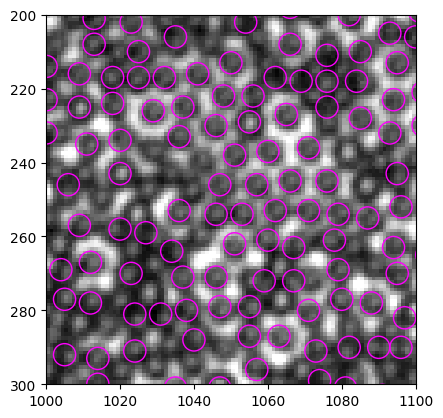

In [9]:
fig, ax = plt.subplots()
left, right, bottom, top = 1000, 1100, 300, 200 # set ROI
b_circ = [plt.Circle((xi, yi), radius=3, linewidth=1, fill=False, ec="magenta") for xi, yi in zip(particles.x, particles.y)]
b = PatchCollection(b_circ, match_original=True)
ax.imshow(img[top:bottom, left:right], cmap="gray", extent=(left, right, bottom, top))
ax.add_collection(b)